In [ ]:
import numpy as np
from utils import *
from kalman import *
import matplotlib.pyplot as plt

u = np.array([1,0.1]) # move in a circle counterclockwise
true_initial_X = np.array([0,5,0,0,0]) 
true_trajectory = []
true_trajectory.append(true_initial_X)
ekf = ExtendedKalmanFilter(5,5,2,0.1)
initial_X = np.array([5,0,0,0,0]) # initialize with an offset
q = 0.1
p= 0.1
initial_Q = np.eye(5) * q
initial_R = np.eye(5) * p
ekf.initialize_X_Q_R(initial_X, initial_Q, initial_R)

def sim_move(X, u, dt):
    assert(u.shape[0] == 2) # u is np.array containing v_,w_
    x,y,theta,v,w = X
    v_, w_ = u
    x_ = x + v*np.cos(theta)*dt 
    y_ = y + v*np.sin(theta)*dt
    theta_ = theta + w * dt
    return np.array([x_,y_,theta_,v_,w_])
def sim_measurement(X, p):
    return X + np.random.normal(0,p,5)
for i in range(500):
    true_X = sim_move(true_trajectory[-1], u, ekf.dt)
    true_trajectory.append(true_X)
    z = sim_measurement(true_X,p)
    ekf.predict_and_update(u,z)
u = np.array([0.5,-0.1])
for i in range(500):
    true_X = sim_move(true_trajectory[-1], u, ekf.dt)
    true_trajectory.append(true_X)
    z = sim_measurement(true_X,p)
    ekf.predict_and_update(u,z)


before clipping: 0.13289925220963103
after clipping: 0.13289925220963106
before clipping: -0.09845994538861536
after clipping: -0.09845994538861547
before clipping: -0.0771347183061624
after clipping: -0.07713471830616259
before clipping: 0.05002926790085374
after clipping: 0.050029267900853824
before clipping: -0.02808925741945152
after clipping: -0.028089257419451563
before clipping: 0.007207961282446593
after clipping: 0.007207961282446718
before clipping: 0.040543326517535686
after clipping: 0.04054332651753567
before clipping: 0.02654713078101617
after clipping: 0.026547130781016115
before clipping: 0.062237122508604636
after clipping: 0.06223712250860469
before clipping: -0.1364860524171941
after clipping: -0.13648605241719425
before clipping: -0.05735003104664855
after clipping: -0.057350031046648375
before clipping: -0.01891091779449325
after clipping: -0.018910917794493276
before clipping: -0.05387998710215197
after clipping: -0.053879987102151805
before clipping: 0.1505970449

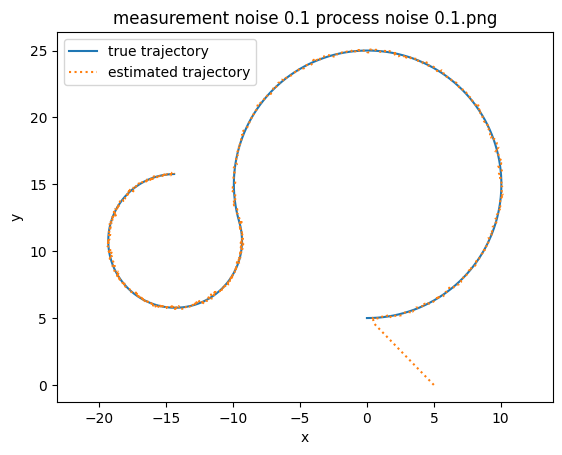

In [5]:
true_x = [X[0] for X in true_trajectory]
true_y = [X[1] for X in true_trajectory]
kalman_x = [X[0] for X in ekf.state_trajectory]
kalman_y = [X[1] for X in ekf.state_trajectory]
plt.figure()
plt.plot(true_x, true_y, label='true trajectory')
plt.plot(kalman_x, kalman_y, label='estimated trajectory', linestyle=':')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.axis('equal')
plt.title(f'measurement noise {p} process noise {q}.png')
plt.savefig(f'measurement noise {p} process noise {q}.png')
plt.show()

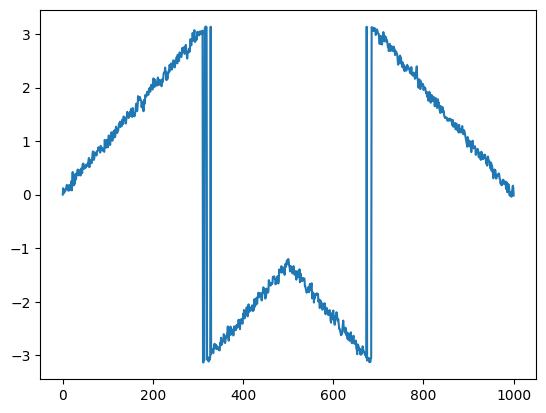

In [6]:
kalman_theta = [X[2] for X in ekf.state_trajectory]
plt.figure()
plt.plot(kalman_theta)
plt.show()